<a href="https://colab.research.google.com/github/SidharthArya/Deep_Learning_Class_Manit/blob/main/Assignments/003_Kernel_Function_to_fit_non_linearly_separable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [46]:
# Transfer/Activation Functions
def step(x):
  return x >= 0

In [47]:
class Perceptron:
  def __init__(self,features=1, alpha=0.1, bias=np.random.normal(loc=0.0,scale=0.01), weights=None, activation=step):
    if weights is None:
      self.weights=np.random.normal(loc=0.0, scale=0.01, size=features).transpose()
    else: self.weights = weights 
    self.activation = activation
    self.alpha = alpha
    self.bias=bias
    self.features = features

  def __predict(self, inputn): # Private Function
    # implement prediction of 1 instance
    if self.features is 1:
      return self.activation(self.weights*inputn + self.bias)[0]
    else:
     return self.activation(self.weights.dot(inputn.transpose()) + self.bias)
    
      
      
  def cost(self, inputn, outputn ):
    # Implement the cost function
    return self.__predict(inputn) - outputn
  

  def predict(self, inputs):
      if self.features is 1:
        return self.activation(self.weights*(inputs) + self.bias)
      else:
        return self.activation(self.weights.dot(inputs.transpose()) + self.bias)
      
        
  

  def train(self, inputs, outputs, epochs=1):   
    t = tqdm.tqdm(range(epochs))
    for epoch in t:
      for i, inputn in enumerate(inputs):
        delta = self.__predict(inputn) - outputs[i]
        t.set_postfix({"loss": delta})
        #print(delta, inputn, outputs[i], self.weights, self.bias)
        self.weight_update(delta, inputn)

  
  def weight_update(self, delta, inputs):
      self.weights = self.weights - self.alpha*delta*(inputs)
      self.bias = self.bias - self.alpha*delta
      #print(self.weights, self.bias)


## Xor Gate is non linearly separable

In [48]:
X = np.array([[0,0],
     [0,1],
     [1,0],
     [1,1]
     ])
Y=np.array([0,1,1,0])

In [49]:
# Mapping to a 1 D space
def kernel_function(x):
  return (x[0]-x[1])**2

In [50]:
perceptron = Perceptron(features=1)

### Before Training

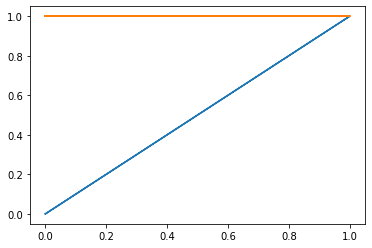

In [51]:

plt.plot(kernel_function([X[:,0],X[:,1]]),Y)
plt.plot(kernel_function([X[:,0],X[:,1]]), perceptron.predict(kernel_function([X[:,0],X[:,1]])))


In [52]:
perceptron.predict(np.array(kernel_function([X[:,0],X[:,1]]))) 

array([ True,  True,  True,  True])

## Training

In [53]:
perceptron.train(kernel_function(np.array([X[:,0], X[:,1]])),Y, epochs=20)

100%|██████████| 20/20 [00:00<00:00, 212.35it/s, loss=0]


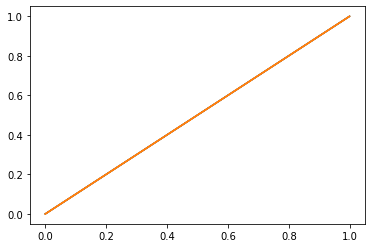

In [54]:

plt.plot(kernel_function([X[:,0],X[:,1]]),Y)
plt.plot(kernel_function([X[:,0],X[:,1]]), perceptron.predict(kernel_function([X[:,0],X[:,1]])))


In [55]:
perceptron.predict(kernel_function(np.array([X[:,0], X[:,1]])))

array([False,  True,  True, False])

In [56]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

## XNor Gate is non linearly separable

In [63]:
X = np.array([[0,0],
     [0,1],
     [1,0],
     [1,1]
     ])
Y=np.array([1,0,0,1])

In [64]:
perceptron = Perceptron(features=1)


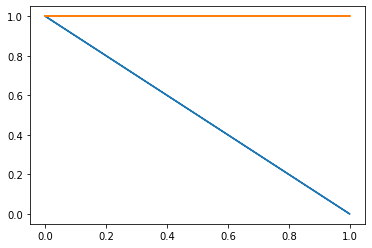

In [65]:

plt.plot(kernel_function([X[:,0],X[:,1]]),Y)
plt.plot(kernel_function([X[:,0],X[:,1]]), perceptron.predict(kernel_function([X[:,0],X[:,1]])))


In [66]:
perceptron.predict(kernel_function(np.array([X[:,0], X[:,1]])))

array([ True,  True,  True,  True])

In [67]:
perceptron.train(kernel_function(np.array([X[:,0], X[:,1]])),Y, epochs=20)

100%|██████████| 20/20 [00:00<00:00, 115.91it/s, loss=0]


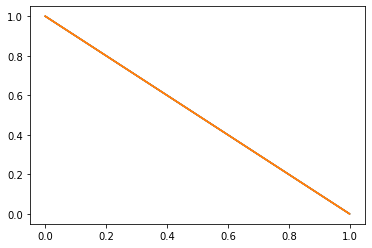

In [68]:

plt.plot(kernel_function([X[:,0],X[:,1]]),Y)
plt.plot(kernel_function([X[:,0],X[:,1]]), perceptron.predict(kernel_function([X[:,0],X[:,1]])))
